In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

The First Part of our Project is opening the tables and getting a feel of the data 

In [4]:
flights = pd.read_csv('flights.csv')
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

C:\Users\Yahia\AppData\Local\Temp\ipykernel_3932\884131147.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


In [5]:
flights.head()
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [6]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


After acessing the data we can determine that the data can be joined on the following attributes :


flights.ORIGIN_AIRPORT = airports.IATA_CODE


flights.DESTINATION_AIRPORT = airports.IATA_CODE
flights.AIRLINE = airlines.IATA_CODE


flights.DESTINATION_AIRPORT = airports.IATA_CODE
flights.AIRLINE = airlines.IATA_CODE


In [8]:
mergedPD =pd.merge(flights, airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left')

After Intial Merging We need to rename columns to little ensure a no confusion

In [9]:

mergedPD.rename(columns={'IATA_CODE': 'DEST_AIRPORT_IATA_CODE',
                   'AIRPORT': 'DEST_AIRPORT_NAME',
                   'CITY': 'DEST_AIRPORT_CITY',
                   'STATE': 'DEST_AIRPORT_STATE',
                   'COUNTRY': 'DEST_AIRPORT_COUNTRY',
                   'LATITUDE': 'DEST_AIRPORT_LATITUDE',
                    'LONGITUDE': 'DEST_AIRPORT_LONGITUDE',
                   },
          inplace=True, errors='raise')

mergedPD.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEST_AIRPORT_IATA_CODE,DEST_AIRPORT_NAME,DEST_AIRPORT_CITY,DEST_AIRPORT_STATE,DEST_AIRPORT_COUNTRY,DEST_AIRPORT_LATITUDE,DEST_AIRPORT_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


We can now continue to alter the merged database to enclose all outputs

In [10]:
mergedPD =pd.merge(mergedPD, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')

In [11]:
mergedPD.rename(columns={'IATA_CODE': 'ORIGIN_AIRPORT_IATA_CODE',
                   'AIRPORT': 'ORIGIN_AIRPORT_NAME',
                   'CITY': 'ORIGIN_AIRPORT_CITY',
                   'STATE': 'ORIGIN_AIRPORT_STATE',
                   'COUNTRY': 'ORIGIN_AIRPORT_COUNTRY',
                   'LATITUDE': 'ORIGIN_AIRPORT_LATITUDE',
                    'LONGITUDE': 'ORIGIN_AIRPORT_LONGITUDE',
                   },
          inplace=True, errors='raise')

mergedPD.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DEST_AIRPORT_COUNTRY,DEST_AIRPORT_LATITUDE,DEST_AIRPORT_LONGITUDE,ORIGIN_AIRPORT_IATA_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,USA,26.68316,-80.09559,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,USA,35.21401,-80.94313,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,USA,25.79325,-80.29056,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


We have now successfully integrated flights and airports now we must add in airlines

In [12]:
mergedPD =pd.merge(mergedPD, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')


In [13]:
mergedPD.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DEST_AIRPORT_LONGITUDE,ORIGIN_AIRPORT_IATA_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-80.09559,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,-80.94313,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-80.29056,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,AS,Alaska Airlines Inc.


In [14]:
mergedPD.rename(columns={'IATA_CODE': 'AIRLINE_IATA_CODE',
                   'AIRLINE_y': 'AIRLINE_NAME'
                   
                   },
          inplace=True, errors='raise')


In [15]:
mergedPD.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_x', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DEST_AIRPORT_IATA_CODE',
       'DEST_AIRPORT_NAME', 'DEST_AIRPORT_CITY', 'DEST_AIRPORT_STATE',
       'DEST_AIRPORT_COUNTRY', 'DEST_AIRPORT_LATITUDE',
       'DEST_AIRPORT_LONGITUDE', 'ORIGIN_AIRPORT_IATA_CODE',
       'ORIGIN_AIRPORT_NAME', 'ORIGIN_AIRPORT_CITY', 'ORIGIN_AIRPORT_STATE',
       'ORIGIN_AIRPORT_COUNTRY', 'ORIGIN_AIRPORT_LATITUDE',
       'ORIGIN_AIRPORT_LONGITUDE', 'AIRLINE_IATA_CODE', 'AIRLINE_NAME'],
      dtype='object')

We have successfully integrated all data sets into one large data frame

We must now begin cleaning our data 

First To drop repeated columns as a result of merging

In [16]:
mergedPD.drop(columns=["ORIGIN_AIRPORT", "AIRLINE_x","DESTINATION_AIRPORT"], axis=1, inplace=True)

Second to drop columns with an influx of null values

In [17]:
mergedPD.isnull().sum()

YEAR                              0
MONTH                             0
DAY                               0
DAY_OF_WEEK                       0
FLIGHT_NUMBER                     0
TAIL_NUMBER                   14721
SCHEDULED_DEPARTURE               0
DEPARTURE_TIME                86153
DEPARTURE_DELAY               86153
TAXI_OUT                      89047
WHEELS_OFF                    89047
SCHEDULED_TIME                    6
ELAPSED_TIME                 105071
AIR_TIME                     105071
DISTANCE                          0
WHEELS_ON                     92513
TAXI_IN                       92513
SCHEDULED_ARRIVAL                 0
ARRIVAL_TIME                  92513
ARRIVAL_DELAY                105071
DIVERTED                          0
CANCELLED                         0
CANCELLATION_REASON         5729195
AIR_SYSTEM_DELAY            4755640
SECURITY_DELAY              4755640
AIRLINE_DELAY               4755640
LATE_AIRCRAFT_DELAY         4755640
WEATHER_DELAY               

In [18]:
mergedPD.drop(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis = 1, inplace = True) 

In [19]:
mergedPD = mergedPD.dropna(subset=['DEST_AIRPORT_IATA_CODE'])

In [20]:
mergedPD = mergedPD.dropna(subset=['SCHEDULED_TIME'])

We removed all columns who we belive have no hope in being logical ergo, if they didn't have a destination/origin once merged

In [21]:
mergedPD.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
FLIGHT_NUMBER                    0
TAIL_NUMBER                  14367
SCHEDULED_DEPARTURE              0
DEPARTURE_TIME               83814
DEPARTURE_DELAY              83814
TAXI_OUT                     86612
WHEELS_OFF                   86612
SCHEDULED_TIME                   0
ELAPSED_TIME                101778
AIR_TIME                    101778
DISTANCE                         0
WHEELS_ON                    89936
TAXI_IN                      89936
SCHEDULED_ARRIVAL                0
ARRIVAL_TIME                 89936
ARRIVAL_DELAY               101778
DIVERTED                         0
CANCELLED                        0
DEST_AIRPORT_IATA_CODE           0
DEST_AIRPORT_NAME                0
DEST_AIRPORT_CITY                0
DEST_AIRPORT_STATE               0
DEST_AIRPORT_COUNTRY             0
DEST_AIRPORT_LATITUDE         4610
DEST_AIRPORT_LONGITU

Now, these null values can be comptuted however first we must esure that are data is free from outliers

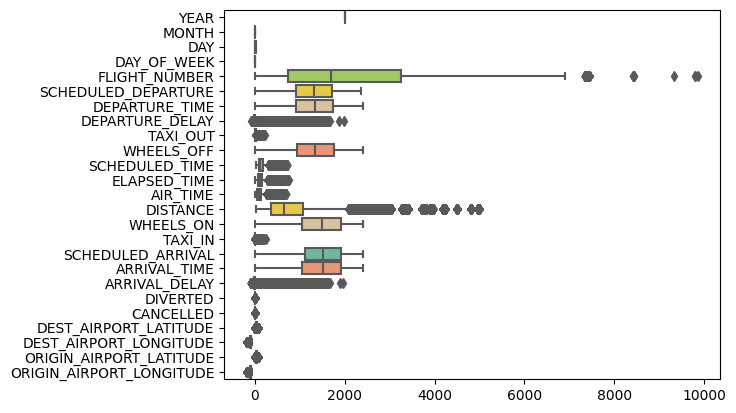

In [22]:
ax = sns.boxplot(data=mergedPD, orient="h", palette="Set2")

After accessing the data we can remove the outliers of the data field distance however for the delays outliers are understandable and expected and for flight number they are supposed to be consider unique 

In [23]:
mergedPD = remove_outlier(mergedPD,'DISTANCE')

In [24]:
mergedPD.interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [25]:
mergedPD.isnull().sum()

YEAR                            0
MONTH                           0
DAY                             0
DAY_OF_WEEK                     0
FLIGHT_NUMBER                   0
TAIL_NUMBER                 12954
SCHEDULED_DEPARTURE             0
DEPARTURE_TIME                  0
DEPARTURE_DELAY                 0
TAXI_OUT                        0
WHEELS_OFF                      0
SCHEDULED_TIME                  0
ELAPSED_TIME                    0
AIR_TIME                        0
DISTANCE                        0
WHEELS_ON                       0
TAXI_IN                         0
SCHEDULED_ARRIVAL               0
ARRIVAL_TIME                    0
ARRIVAL_DELAY                   0
DIVERTED                        0
CANCELLED                       0
DEST_AIRPORT_IATA_CODE          0
DEST_AIRPORT_NAME               0
DEST_AIRPORT_CITY               0
DEST_AIRPORT_STATE              0
DEST_AIRPORT_COUNTRY            0
DEST_AIRPORT_LATITUDE           0
DEST_AIRPORT_LONGITUDE          0
ORIGIN_AIRPORT

C:\Users\Yahia\AppData\Local\Temp\ipykernel_3932\573404064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mergedPD.corr())


<AxesSubplot: >

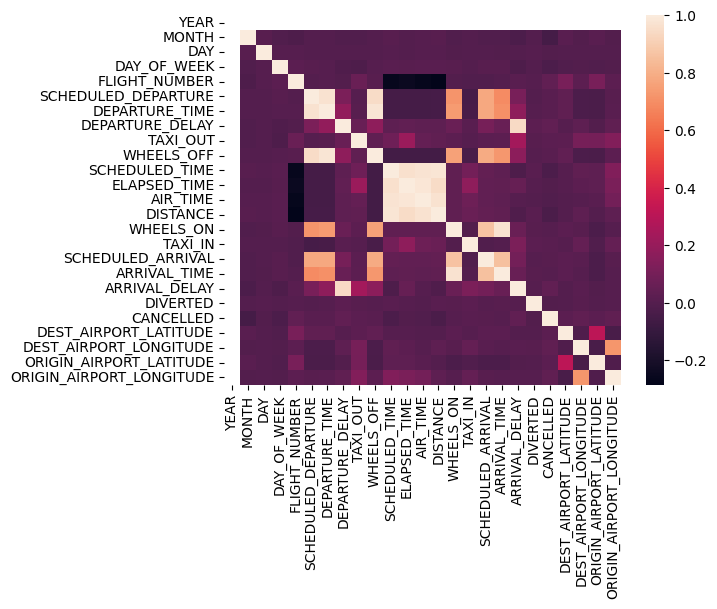

In [26]:
sns.heatmap(mergedPD.corr())

Does the airline have to do correlated to the arrival delay

In [33]:
sns.barplot(x = "AIRLINE_IATA_CODE", y = "ARRIVAL_DELAY",  hue='DEST_AIRPORT_STATE',data = mergedPD)